In [11]:
import fiftyone as fo
dataset_list = fo.list_datasets()
print(dataset_list)

['2024.02.12.12.41.28', '2024.02.20.11.00.16', '2024.02.21.12.42.38', '2024.02.26.15.10.09', '2024.02.28.09.16.55', '2024.02.28.09.30.56', '2024.02.28.13.09.38', '2024.02.28.13.10.55', '2024.02.28.17.31.56', '2024.02.28.18.35.25', '2024.02.28.20.14.51', '2024.02.28.20.16.04', '2024.02.29.09.54.46', '2024.02.29.11.11.15', '2024.02.29.11.12.04', '2024.02.29.11.13.07', '2024.02.29.11.14.33', '2024.02.29.11.28.52', '2024.02.29.11.29.49', '2024.02.29.13.06.10', '2024.02.29.13.06.41', '2024.02.29.13.07.04', '2024.02.29.13.08.02', '2024.02.29.13.08.17', '2024.02.29.13.11.22', '2024.02.29.13.18.40', '2024.02.29.13.30.02', '2024.02.29.13.31.13', '2024.02.29.13.32.34', '2024.02.29.13.37.14', '2024.02.29.13.42.00', '2024.02.29.14.00.47', '2024.02.29.14.03.19', '2024.02.29.14.05.37', '2024.02.29.14.07.52', '2024.02.29.14.11.30', '2024.02.29.15.10.41', '2024.02.29.15.28.12', '2024.02.29.15.28.56', '2024.02.29.15.29.48', '2024.03.01.11.11.37', '2024.03.01.11.36.45', '2024.03.01.11.39.06', '2024.03.0

In [22]:
dataset_name_to_delete = "patches_data"

fo.delete_dataset(dataset_name_to_delete)

In [23]:
import fiftyone as fo

dataset = fo.Dataset.from_dir(
    dataset_type=fo.types.COCODetectionDataset,
    data_path="all_patches_data",
    labels_path="coco_format.json", 
    label_field="ground_truth",
    label_types="detections",
    name="patches_data",
    persistent=True,
)

 100% |███████████| 226300/226300 [1.0m elapsed, 0s remaining, 3.1K samples/s]       



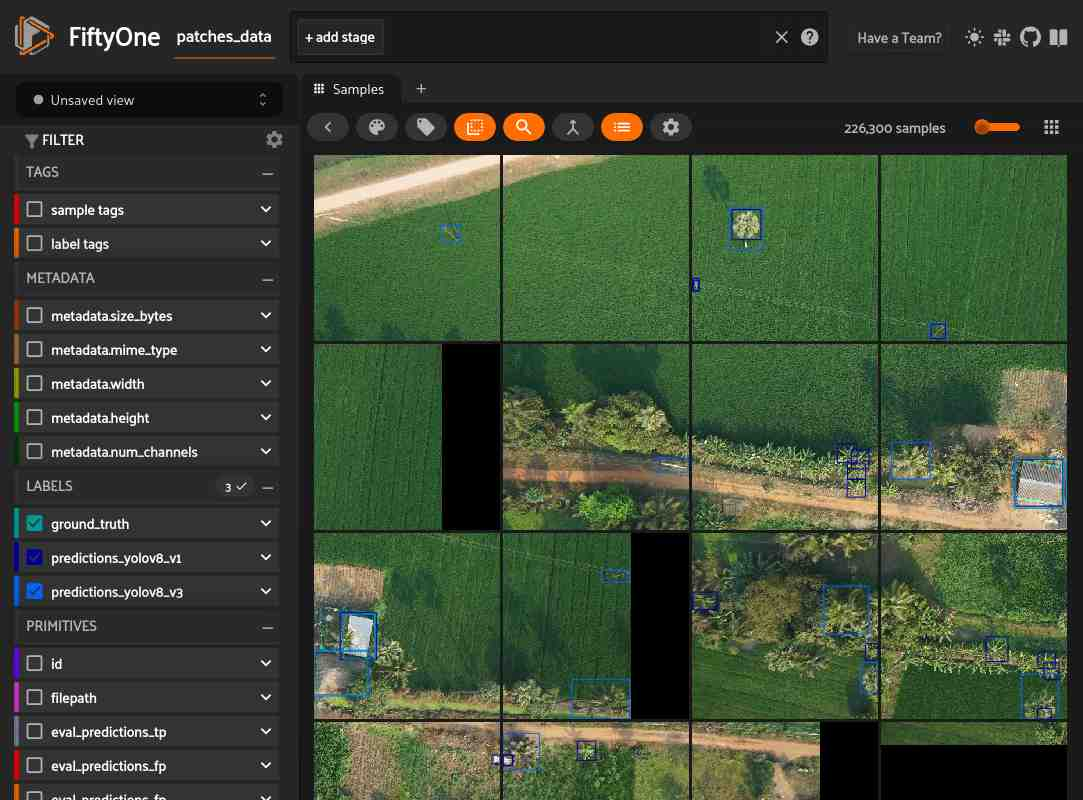

This dataset's evaluation references are corrupted. Run fiftyone.core.odm.database.patch_evaluations('fire-smoke-detection') and dataset.reload() to resolve


In [149]:
session = fo.launch_app(dataset)

In [111]:
dataset

Name:        patches_data
Media type:  image
Num samples: 226300
Persistent:  True
Tags:        []
Sample fields:
    id:                    fiftyone.core.fields.ObjectIdField
    filepath:              fiftyone.core.fields.StringField
    tags:                  fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:              fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth:          fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    predictions_yolov8_v1: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    eval_predictions_tp:   fiftyone.core.fields.IntField
    eval_predictions_fp:   fiftyone.core.fields.IntField
    eval_predictions_fn:   fiftyone.core.fields.IntField
    uniqueness:            fiftyone.core.fields.FloatField
    mistakenness:          fiftyone.core.fields.IntField
    possible_missing:      fiftyone.core.fields.IntField
    possible_s

In [31]:
count =0

for sample in dataset:
    if sample.ground_truth == False:
        count += 1

print(count)

0


In [34]:
for sample in dataset:
    print(sample)
    break

<Sample: {
    'id': '65e59b3631a66771eb961c8f',
    'media_type': 'image',
    'filepath': '/home/naveen/workspace/voxel/Pipline_workspace/all_patches_data/6d8e2a6e-c00a-4509-ba2b-a6d763e1a31a.jpg',
    'tags': [],
    'metadata': <ImageMetadata: {
        'size_bytes': None,
        'mime_type': None,
        'width': 1280,
        'height': 1280,
        'num_channels': None,
    }>,
    'ground_truth': None,
}>


In [39]:
from fiftyone import ViewField as F

view = dataset.filter_labels("ground_truth", F("ground_truth") == None, only_matches=True)

In [112]:
session.view=view

In [41]:
import fiftyone as fo

export_dir = "patches_data_pipeline"
label_field = "ground_truth"

classes = ["ELECTRIC_POLES", "TREES", "TEMPORARY_STRUCTURES", "PERMENANT_STRUCTURES","SOLAR", "PYLON", "WELL", "TLP"]

view.export(
    export_dir=export_dir,
    dataset_type=fo.types.YOLOv5Dataset,
    label_field=label_field,
    split = 
    classes=classes,
)

 100% |█████████████| 53857/53857 [1.3m elapsed, 0s remaining, 1.3K samples/s]        


In [49]:
count = 0
for sample in dataset:
    if sample.ground_truth == None and len(sample.predictions_yolov8_v1.detections) > 0:
        count += 1

print(count)

16166


In [117]:
count = 0
for sample in dataset:
    if sample.ground_truth == None and len(sample.predictions_yolov8_v3.detections) > 0:
        count += 1

print(count)

14526


In [98]:
for sample in dataset:
    if sample.ground_truth == None and len(sample.predictions_yolov8_v1.detections) > 0:
            sample.tags.append("no_gt")
            sample.save()

In [51]:
import cv2
import numpy as np
                          
import fiftyone.brain as fob

results = fob.compute_visualization(
   dataset, brain_key="patches_emb"
)

Computing embeddings...
 100% |██████████/| 225734/226300 [1.5h elapsed, 13.4s remaining, 42.2 samples/s]   

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




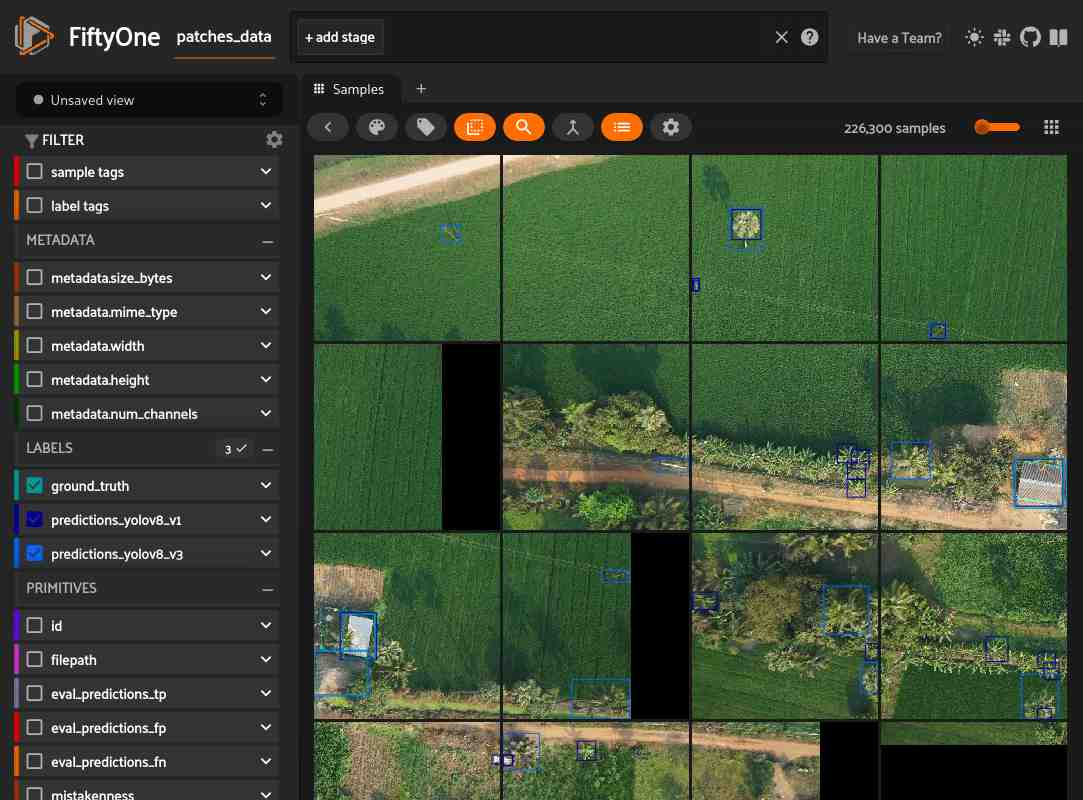

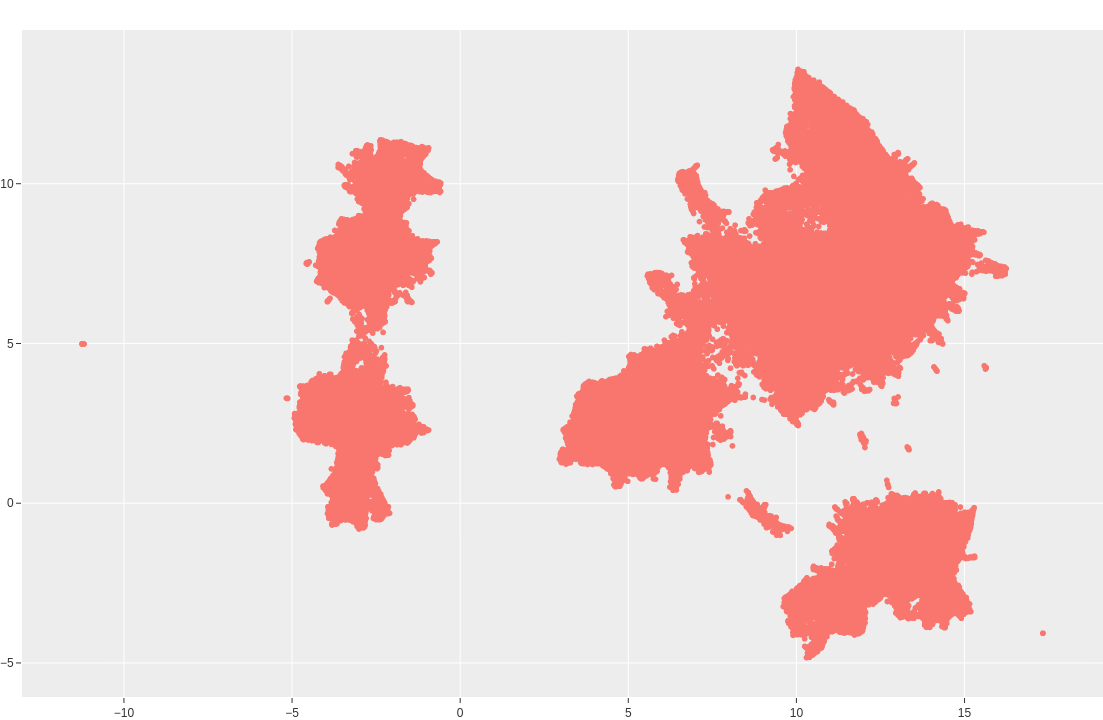

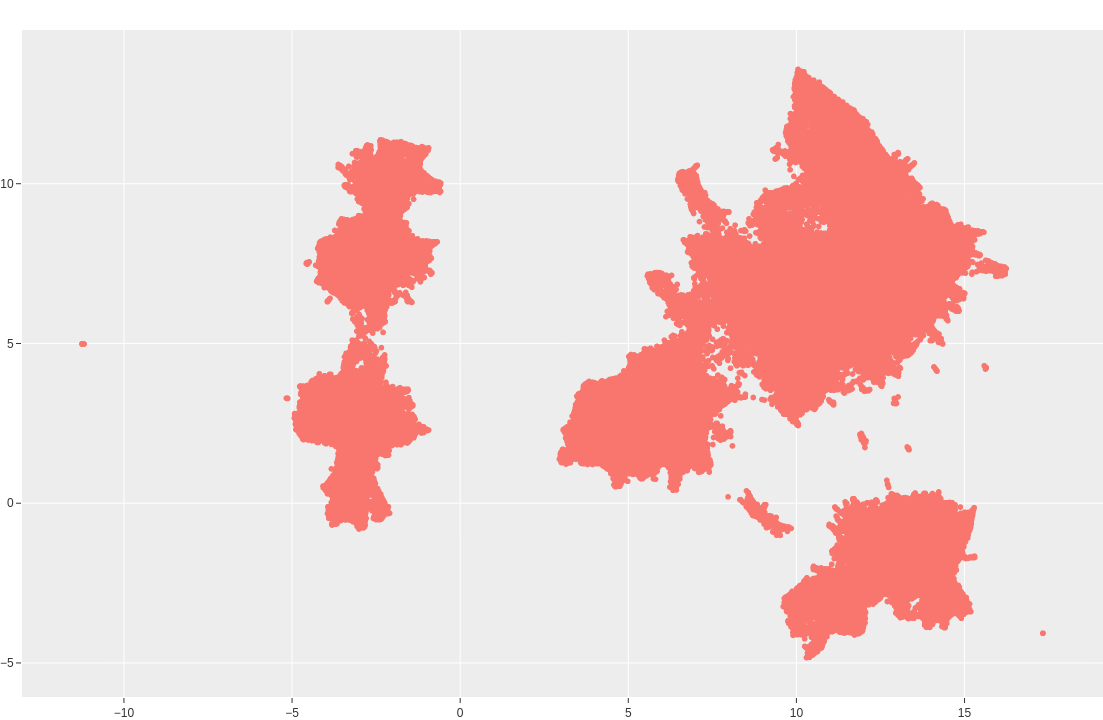

FigureWidget({
    'data': [{'customdata': array(['65e59b3631a66771eb961c8f', '65e59b3631a66771eb961c90',
                                   '65e59b3631a66771eb961c91', ..., '65e59b7531a66771eb9b56d5',
                                   '65e59b7531a66771eb9b56d6', '65e59b7531a66771eb9b56d7'], dtype=object),
              'hovertemplate': 'x, y = %{x:.3f}, %{y:.3f}<br>ID: %{customdata}<extra></extra>',
              'mode': 'markers',
              'type': 'scattergl',
              'uid': '6f035d87-59dc-4197-9bff-635f4bb592de',
              'x': array([ 6.989192 ,  6.4036026,  5.795181 , ..., -1.0277404, -1.1498231,
                          -2.9528997], dtype=float32),
              'y': array([ 3.1513147,  3.3682635,  3.0557573, ..., 11.024164 , 11.121753 ,
                           9.841045 ], dtype=float32)}],
    'layout': {'height': 720, 'margin': {'b': 0, 'l': 0, 'r': 0, 't': 30}, 'template': '...'}
})

In [136]:
session = fo.launch_app(dataset)
plot = results.visualize()
plot.show(height=720)

session.plots.attach(plot)

In [56]:
results_1 = dataset.evaluate_detections(
    "predictions_yolov8_v1",
    gt_field="ground_truth",
    eval_key="eval_predictions",
    compute_mAP=True,
    classwise=False
)

Evaluating detections...
 100% |███████████| 226300/226300 [3.1m elapsed, 0s remaining, 1.2K samples/s]        
Performing IoU sweep...
 100% |███████████| 226300/226300 [2.2m elapsed, 0s remaining, 1.6K samples/s]        


In [119]:
results_2 = dataset.evaluate_detections(
    "predictions_yolov8_v3",
    gt_field="ground_truth",
    eval_key="eval_predictions_2",
    compute_mAP=True,
    classwise=False
)

Evaluating detections...
 100% |███████████| 226300/226300 [3.6m elapsed, 0s remaining, 972.9 samples/s]       
Performing IoU sweep...
 100% |███████████| 226300/226300 [2.5m elapsed, 0s remaining, 1.3K samples/s]       


In [134]:
counts = dataset.count_values("ground_truth.detections.label")
classes = sorted(counts, key=counts.get, reverse=True)[:8]

results_1.print_report(classes=classes)

                      precision    recall  f1-score   support

               TREES       0.08      0.09      0.09     59076
PERMENANT_STRUCTURES       0.30      0.36      0.33     22241
      ELECTRIC_POLES       0.10      0.04      0.06     16751
               PYLON       0.32      0.44      0.37      6939
TEMPORARY_STRUCTURES       0.13      0.16      0.15      6832
                WELL       0.35      0.51      0.41      3825
               SOLAR       0.25      0.01      0.01       496
                 TLP       0.00      0.00      0.00       141

           micro avg       0.16      0.18      0.17    116301
           macro avg       0.19      0.20      0.18    116301
        weighted avg       0.15      0.18      0.16    116301



In [120]:
counts = dataset.count_values("ground_truth.detections.label")
classes = sorted(counts, key=counts.get, reverse=True)[:8]

results_2.print_report(classes=classes)

                      precision    recall  f1-score   support

               TREES       0.67      0.68      0.67     59076
PERMENANT_STRUCTURES       0.56      0.71      0.63     22241
      ELECTRIC_POLES       0.67      0.71      0.69     16751
               PYLON       0.77      0.72      0.75      6939
TEMPORARY_STRUCTURES       0.63      0.61      0.62      6832
                WELL       0.83      0.82      0.83      3825
               SOLAR       0.11      0.81      0.19       496
                 TLP       0.65      0.52      0.57       141

           micro avg       0.64      0.69      0.66    116301
           macro avg       0.61      0.70      0.62    116301
        weighted avg       0.65      0.69      0.67    116301



In [133]:
plot = results_1.plot_confusion_matrix(classes=classes)
plot.show()

session.plots.attach(plot)

FigureWidget({
    'data': [{'mode': 'markers',
              'opacity': 0.1,
              'type': 'scatter',
              'uid': 'e6611f07-9447-4754-8612-1d6099eb9d32',
              'x': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5,
                          6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2,
                          3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8,
                          0, 1, 2, 3, 4, 5, 6, 7, 8]),
              'y': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
                          2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5,
                          5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7,
                          8, 8, 8, 8, 8, 8, 8, 8, 8])},
             {'colorscale': [[0.0, 'rgb(255,245,235)'], [0.125,
                             'rgb(254,230,206)'], [0.25, 'rgb(253

In [130]:
plot = results_2.plot_confusion_matrix(classes=classes)
plot.show()

session.plots.attach(plot)

FigureWidget({
    'data': [{'mode': 'markers',
              'opacity': 0.1,
              'type': 'scatter',
              'uid': '034262bc-9278-48e1-83c2-8fae1f477a11',
              'x': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5,
                          6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2,
                          3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8,
                          0, 1, 2, 3, 4, 5, 6, 7, 8]),
              'y': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
                          2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5,
                          5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7,
                          8, 8, 8, 8, 8, 8, 8, 8, 8])},
             {'colorscale': [[0.0, 'rgb(255,245,235)'], [0.125,
                             'rgb(254,230,206)'], [0.25, 'rgb(253

In [131]:
session.view = dataset.match(F("eval_predictions_2") == False)

In [78]:
print(results_1.mAP())

0.057047826557065605


In [132]:
print(results_2.mAP())

0.3707577505021379


In [79]:
plot = results_1.plot_pr_curves(classes=classes)
plot.show()

FigureWidget({
    'data': [{'customdata': array([0.94229478, 0.82601749, 0.81876649, 0.8115389 , 0.80345227, 0.78782814,
                                   0.71471515, 0.71026833, 0.7061177 , 0.70219672, 0.69796959, 0.69301222,
                                   0.68708942, 0.6775502 , 0.66738478, 0.64761811, 0.59817258, 0.59496483,
                                   0.59133518, 0.58730671, 0.58326876, 0.57749195, 0.57019269, 0.56287829,
                                   0.55275122, 0.53767346, 0.52448848, 0.47874494, 0.47200224, 0.46517201,
                                   0.4574701 , 0.4473013 , 0.43507955, 0.42132161, 0.40849381, 0.39202583,
                                   0.346603  , 0.33509117, 0.3229099 , 0.30849406, 0.29338028, 0.27550814,
                                   0.25285217, 0.21114922, 0.19443637, 0.17655655, 0.15659216, 0.11708141,
                                   0.10203743, 0.06426397, 0.02975591, 0.        , 0.        , 0.        ,
                      

In [126]:
plot = results_2.plot_pr_curves(classes=classes)
plot.show()

FigureWidget({
    'data': [{'customdata': array([0.98883772, 0.97175494, 0.95513592, 0.94193595, 0.91708771, 0.84789904,
                                   0.8347099 , 0.82113377, 0.80588717, 0.78856239, 0.76661928, 0.75154453,
                                   0.74410485, 0.73896958, 0.73432208, 0.73026636, 0.72686809, 0.72242573,
                                   0.71833095, 0.71429443, 0.71023322, 0.70617213, 0.70075281, 0.69484615,
                                   0.68403948, 0.6631699 , 0.6276487 , 0.62581698, 0.62388219, 0.62141104,
                                   0.61903271, 0.61648952, 0.61390705, 0.61122784, 0.60861093, 0.60547561,
                                   0.60247796, 0.59947594, 0.59633512, 0.59258013, 0.58833293, 0.5841023 ,
                                   0.57916234, 0.57429714, 0.56805758, 0.56089398, 0.55423715, 0.54574245,
                                   0.53755823, 0.52734631, 0.48962352, 0.4848956 , 0.48033776, 0.47535145,
                      

In [128]:
fob.compute_uniqueness(dataset)

Computing embeddings...
 100% |███████████| 226300/226300 [5.0m elapsed, 0s remaining, 750.0 samples/s]      
Computing uniqueness...
Computing neighbors for 226300 embeddings; this may take awhile...
Uniqueness computation complete


In [85]:
fob.compute_mistakenness(dataset, "predictions_yolov8_v1", label_field="ground_truth")

Evaluating detections...
 100% |███████████| 226300/226300 [3.7m elapsed, 0s remaining, 1.0K samples/s]        
Computing mistakenness...
 100% |███████████| 226300/226300 [3.2m elapsed, 0s remaining, 1.2K samples/s]        
Mistakenness computation complete


In [129]:
fob.compute_mistakenness(dataset,mistakenness_field='mistakenness_3', missing_field='possible_missing_3',
                         spurious_field='possible_spurious_3',  pred_field="predictions_yolov8_v3", label_field="ground_truth")

Evaluating detections...
 100% |███████████| 226300/226300 [3.9m elapsed, 0s remaining, 916.2 samples/s]       
Computing mistakenness...
 100% |███████████| 226300/226300 [3.6m elapsed, 0s remaining, 965.0 samples/s]       
Mistakenness computation complete


In [100]:
from fiftyone import ViewField as F

mistake_view = dataset.sort_by("mistakenness", reverse=True)

print(mistake_view)

Dataset:     patches_data
Media type:  image
Num samples: 226300
Sample fields:
    id:                    fiftyone.core.fields.ObjectIdField
    filepath:              fiftyone.core.fields.StringField
    tags:                  fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:              fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth:          fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    predictions_yolov8_v1: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    eval_predictions_tp:   fiftyone.core.fields.IntField
    eval_predictions_fp:   fiftyone.core.fields.IntField
    eval_predictions_fn:   fiftyone.core.fields.IntField
    uniqueness:            fiftyone.core.fields.FloatField
    mistakenness:          fiftyone.core.fields.IntField
    possible_missing:      fiftyone.core.fields.IntField
    possible_spurious:     fiftyone.core.fields.

In [138]:
from fiftyone import ViewField as F

mistake_view_2= dataset.sort_by("mistakenness_3", reverse=True)

print(mistake_view_2)

Dataset:     patches_data
Media type:  image
Num samples: 226300
Sample fields:
    id:                    fiftyone.core.fields.ObjectIdField
    filepath:              fiftyone.core.fields.StringField
    tags:                  fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:              fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth:          fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    predictions_yolov8_v1: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    eval_predictions_tp:   fiftyone.core.fields.IntField
    eval_predictions_fp:   fiftyone.core.fields.IntField
    eval_predictions_fn:   fiftyone.core.fields.IntField
    mistakenness:          fiftyone.core.fields.IntField
    possible_missing:      fiftyone.core.fields.IntField
    possible_spurious:     fiftyone.core.fields.IntField
    predictions_yolov8_v3: fiftyone.core.fields.Em


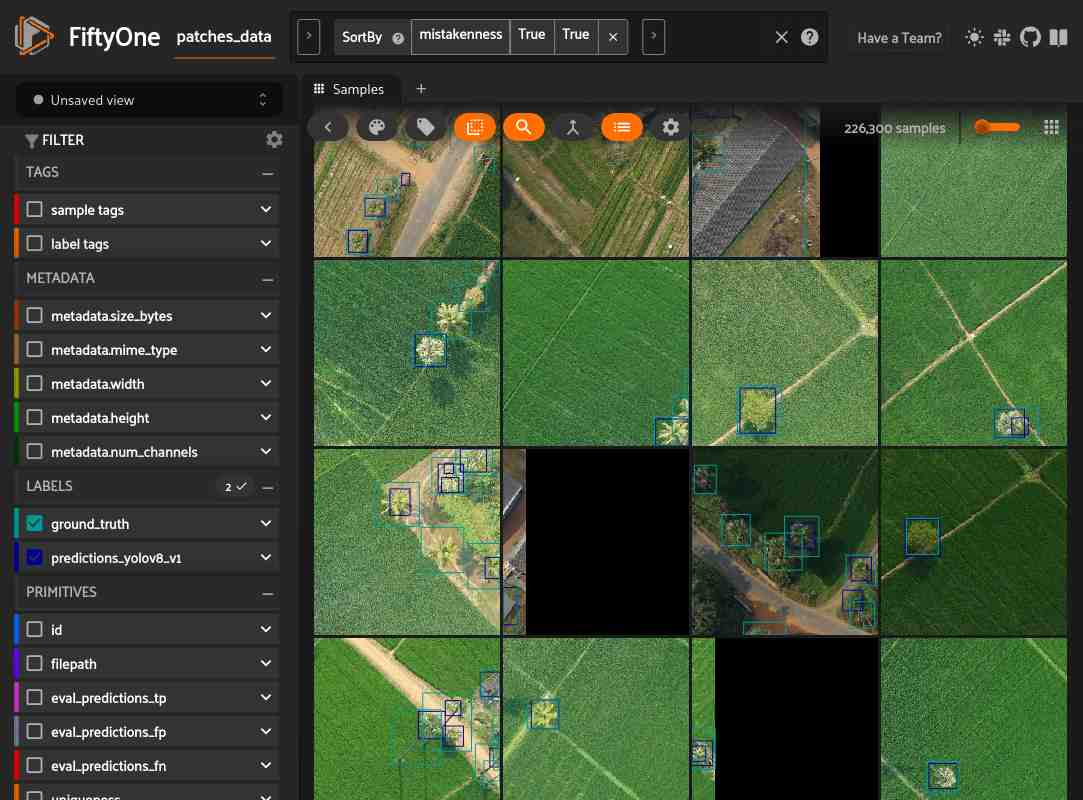

In [103]:
session.view = mistake_view


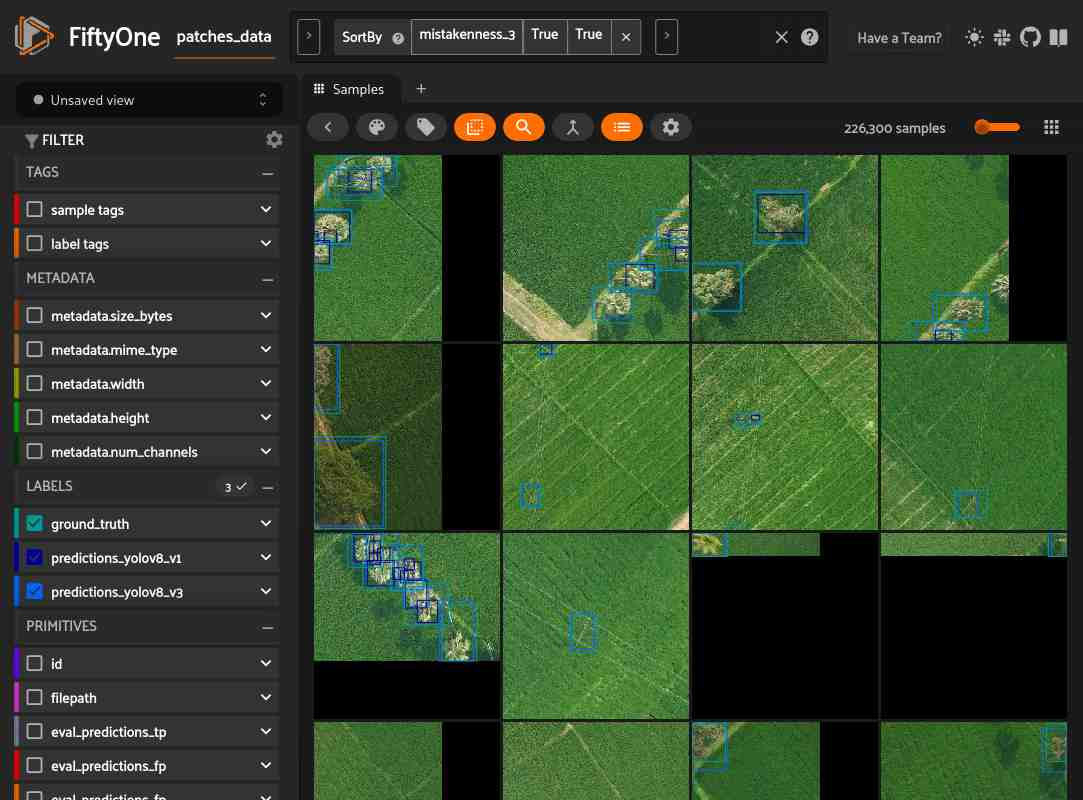

In [141]:
session.view = mistake_view_2


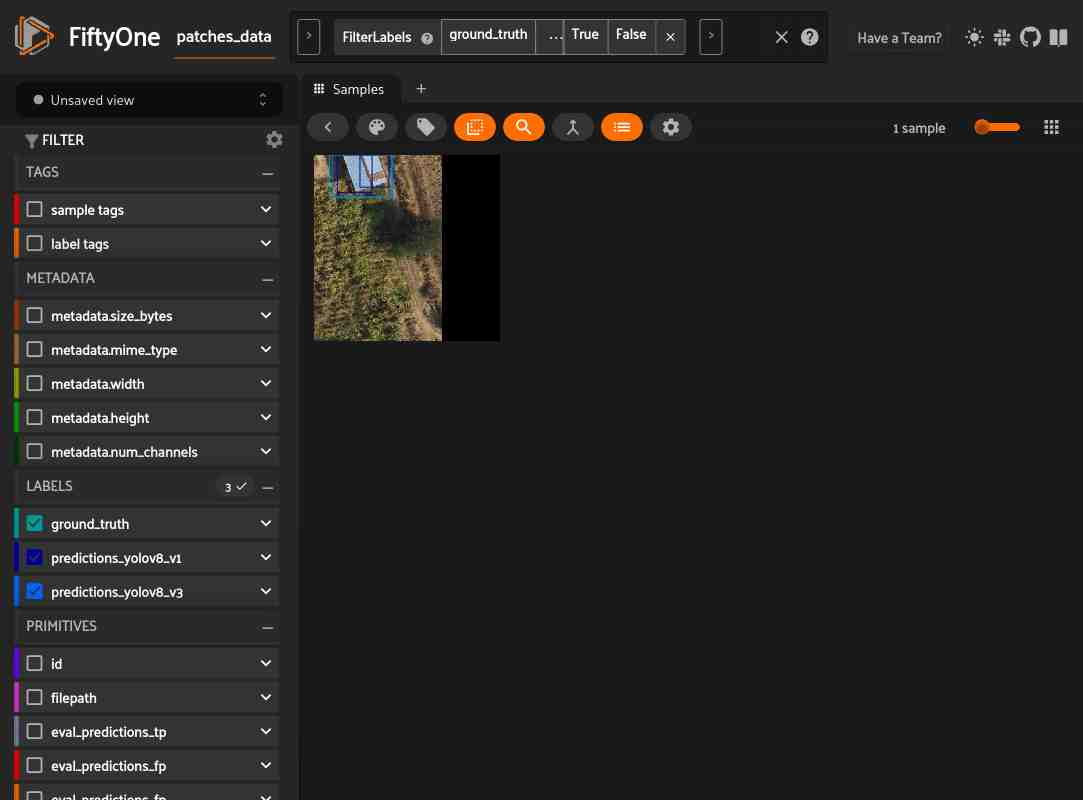

In [115]:
from fiftyone import ViewField as F

session.view = dataset.filter_labels("ground_truth", F("mistakenness") > 0.95)

In [148]:
from fiftyone import ViewField as F

session.view = dataset.filter_labels("ground_truth", F("mistakenness_3") > 0.8)


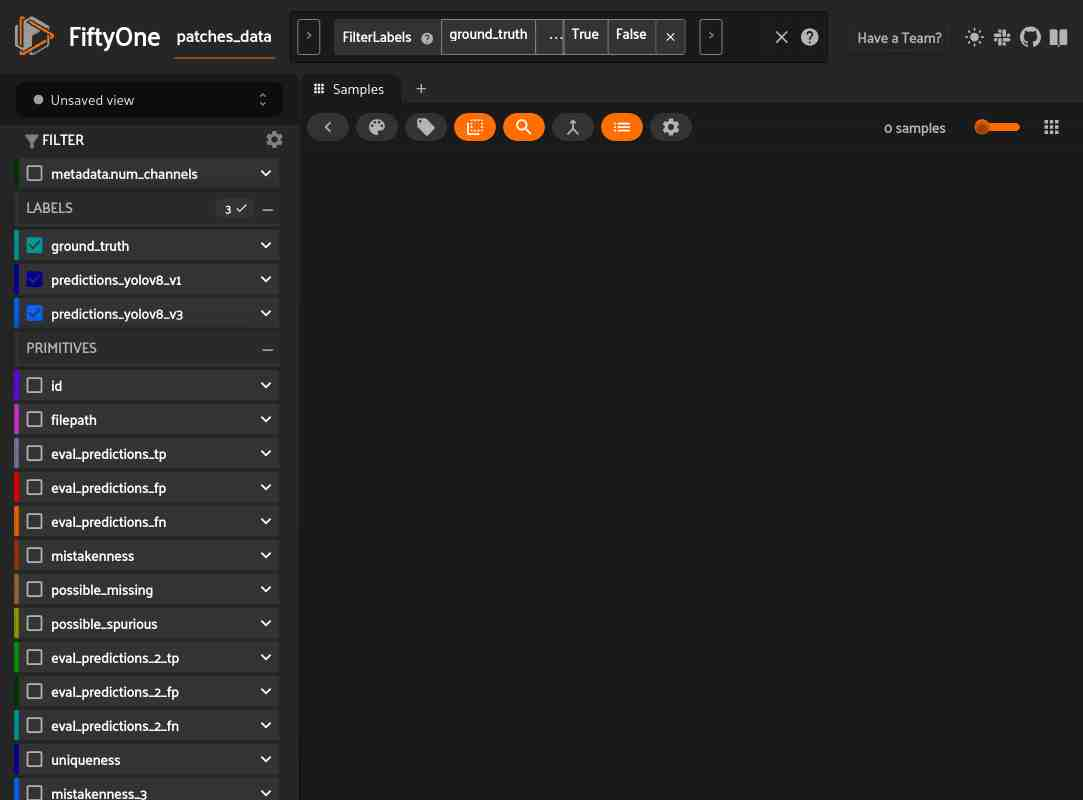

In [147]:
session.view = dataset.filter_labels("ground_truth", F("mistakenness_loc") > 0.9)